#### Index:

1. Exploratory Analysis of Data
2. Comparision of all model before pre-processing
3. Logistic Regression
4. Linear Discriminat Analysis
5. KNN
6. Classification Tree
7. Random Forest
8. Transformer
9. Does pre-processing has any effect on Models?
10. Conclusion

## 1. EXPLORATORY DATA ANALYSIS

In [13]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
import pandas  as pd
import missingno as msno
import seaborn as sns
import altair as alt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import warnings
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from ISLP import load_data , confusion_table
from ISLP.models import ModelSpec as MS
import sklearn.model_selection as skm
from sklearn.metrics import (accuracy_score, log_loss)
from matplotlib.pyplot import subplots
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  OneHotEncoder


#### 1.1 Overview on dataset

In [14]:
data = pd.read_csv("milknew.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


#### 1.2 To get range of data

In [15]:
data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


#### 1.3 To check missing value

<Axes: >

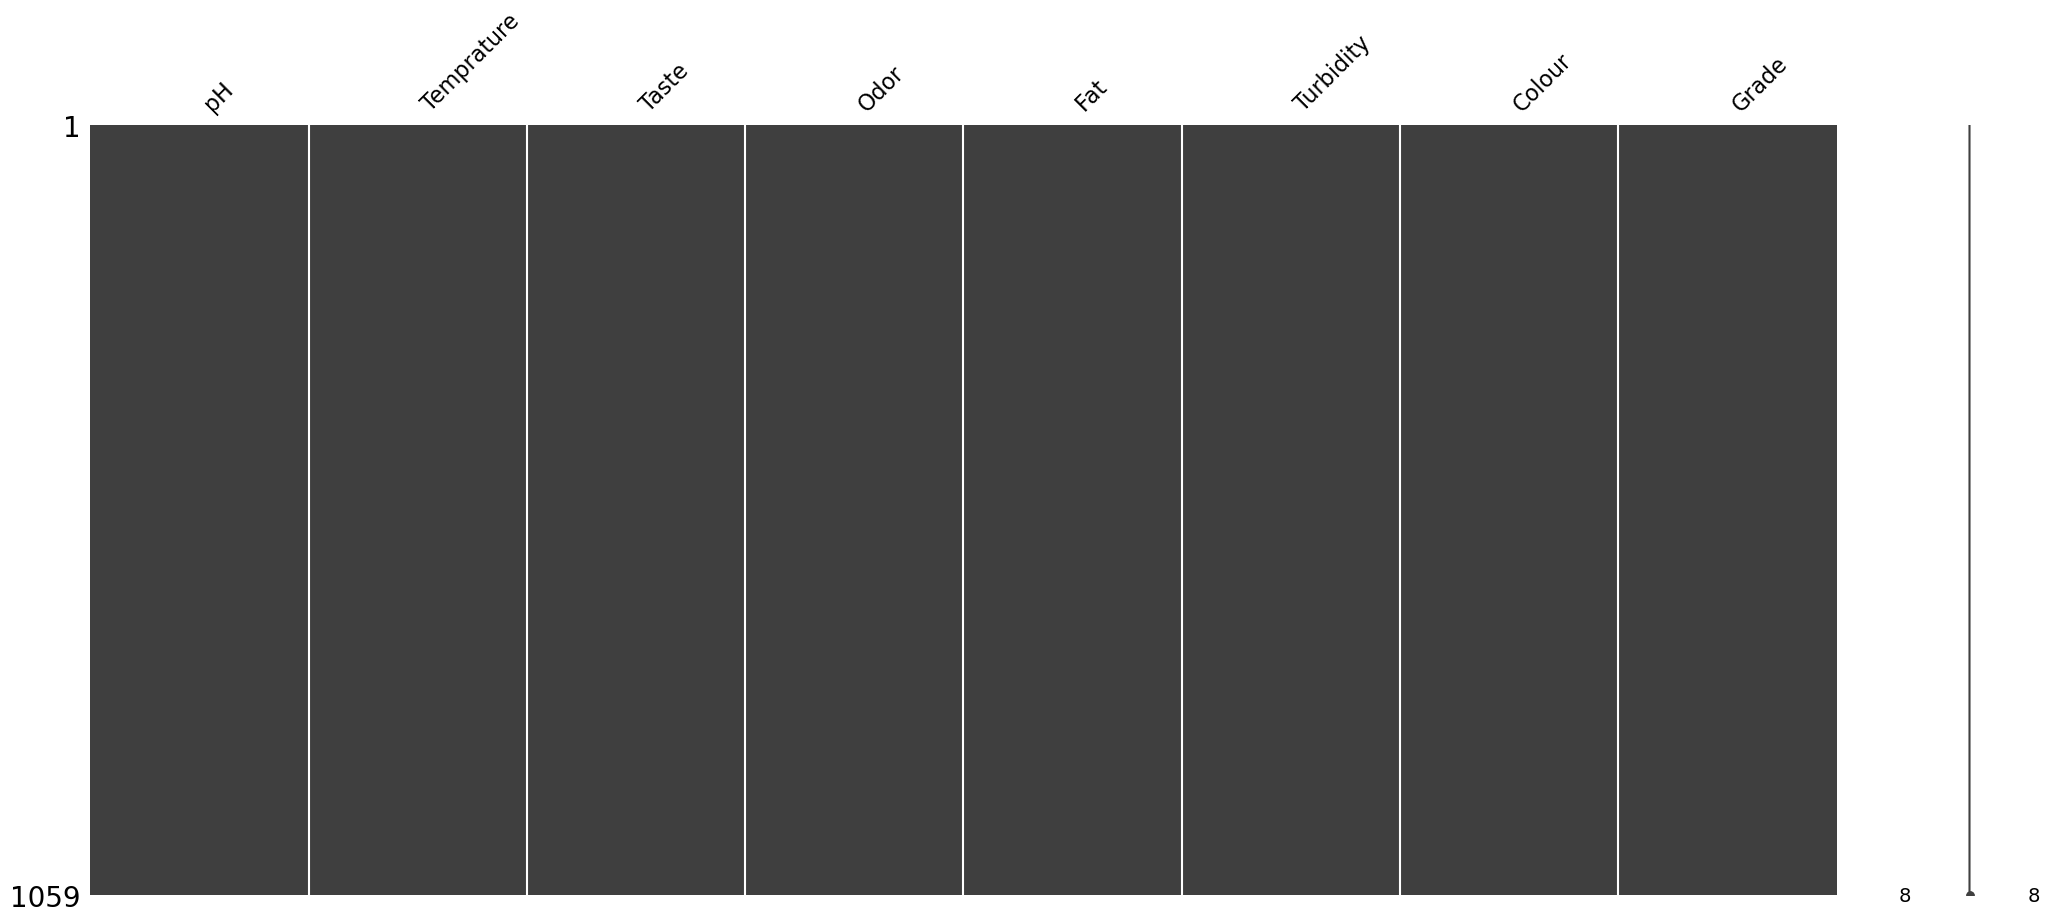

In [16]:
msno.matrix(data)

#### 1.4 Checking Normality with QQ plot

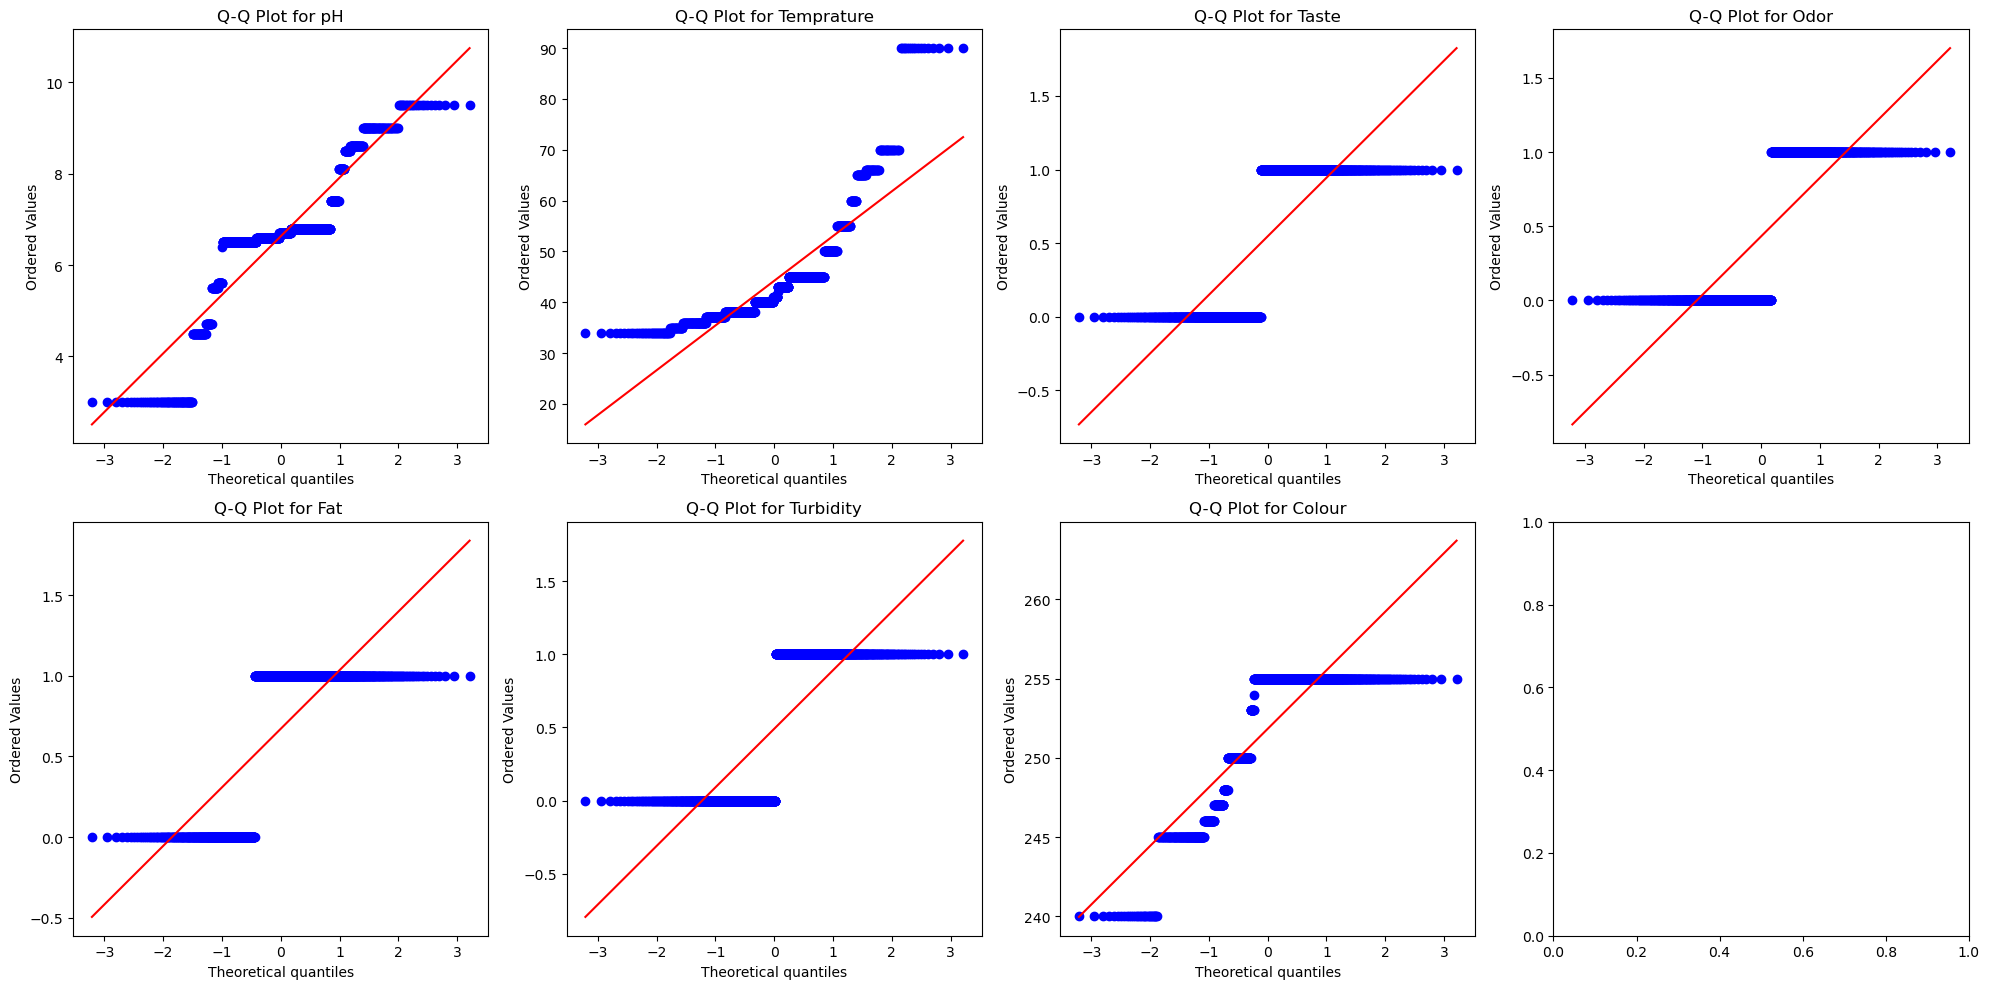

In [17]:
y = data['Grade']
X = data.drop('Grade', axis=1)

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
for i, col in enumerate(X.columns):
    plt.subplot(2, 4, i+1)
    stats.probplot(X[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {col}')
plt.tight_layout()
plt.show()

#### 1.5 Checking grade distribution

In [18]:
# checking even distribution
gradedistribution = data.groupby(['Grade'])['Grade'].count()
gradeFrame = pd.DataFrame({'Grade':gradedistribution.index, 'Count':gradedistribution.values})
alt.Chart(gradeFrame).mark_bar().encode(x='Grade', y ='Count', color = 'Grade').properties(width=100)

alt.Chart(...)

#### 1.6 Checking correlation among variables

C:\Users\karth\AppData\Local\Temp\ipykernel_14556\3493167231.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


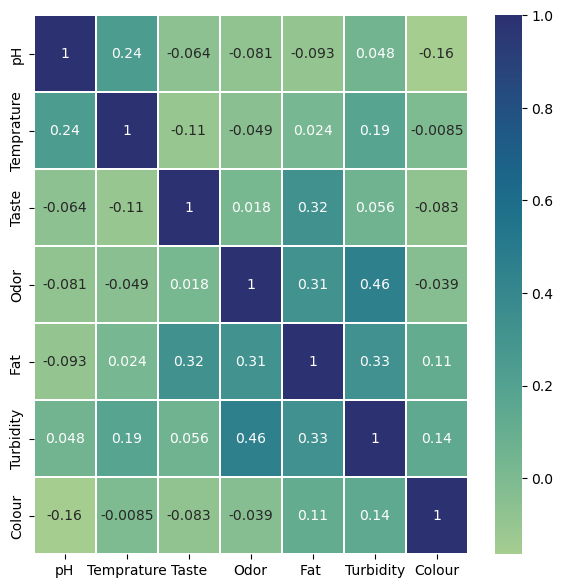

In [19]:
# Checking correlation of data
correlation = data.corr()
plt.figure(figsize=(7,7))
sns.heatmap(correlation,annot=True,cmap='crest',linewidths=0.2)
plt.show()

#### 1.7 Distribution of data  ?

In [20]:
alt.Chart(data).mark_bar().encode(
    alt.X(alt.repeat('column'), type='nominal'),
    alt.Y('count()', title='count', scale=alt.Scale(domain=[0, 800])),
    tooltip=['count()'],
    color=alt.Color('Grade:N')).properties(
    width=150, 
    height=150).repeat(column=['Taste', 'Odor', 'Fat ', 'Turbidity'])

alt.RepeatChart(...)

#### 1.8 Distribution and  Outliers

In [21]:
d1 = alt.Chart(data).transform_density('pH', groupby=['Grade'], as_=['pH', 'density']).mark_area(opacity=0.4).encode(
    alt.X('pH', title='pH'),
    alt.Y('density:Q', title=None),
    alt.Color('Grade:N')
).properties(height=150, width=160)

d2 = alt.Chart(data).transform_density('Temprature', groupby=['Grade'], as_=['Temprature', 'density']).mark_area(opacity=0.4).encode(
    alt.X('Temprature', title='Temperature'),
    alt.Y('density:Q', title=None),
    alt.Color('Grade:N')
).properties(height=150, width=160)

d3 = alt.Chart(data).transform_density('Colour', groupby=['Grade'], as_=['Colour', 'density']).mark_area(opacity=0.4).encode(
    alt.X('Colour', title='Colour'),
    alt.Y('density:Q', title=None),
    alt.Color('Grade:N')
).properties(height=150, width=160) 


b1 = alt.Chart(data, height=150, width=150).mark_boxplot().encode(
    alt.X("Grade:N"),
    alt.Y("pH:Q").scale(zero=True),
    alt.Color("Grade:N").legend(None),
)

b2 = alt.Chart(data, height=150, width=150).mark_boxplot().encode(
    alt.X("Grade:N"),
    alt.Y("Temprature:Q", title='Temperature').scale(zero=True),
    alt.Color("Grade:N").legend(None),
)

b3 = alt.Chart(data, height=150, width=150).mark_boxplot().encode(
    alt.X("Grade:N"),
    alt.Y("Colour:Q").scale(zero=False),
    alt.Color("Grade:N"))


(d1 | d2 | d3) & (b1 | b2 | b3)

alt.VConcatChart(...)

#### 1.8 Duplicates

In [22]:
print("Total number of samples in data: ",(data[data.duplicated()]).shape)

Total number of samples in data:  (976, 8)


### Our thoughts on EDA

- There is no missing value in the dataset
- The numerical columns are not normally distributed
- There is no high correlation among any fields
- Low, Medium, High grade milk are not evenly present however it's not too bad
- The numerical data are not on the same scale eg: the range of ph is [3.9, 5], the range of color is [34,90], the range of temprature is [240,255]

## 2. Comparision of all model (LDA, LR, KNN, Tree, RF) before pre-processing

#### 2.1 Using 10-fold CV and test Comparing all model before pre-processing data

Model                       10-CV Average Score  Test Score
Random Forest                          0.998824    0.995283
Tree Classification                    0.995294    0.990566
KNN                                    0.988207    0.995283
Logistic Regression                    0.847815    0.863208
LinearDiscriminantAnalysis             0.743978    0.731132


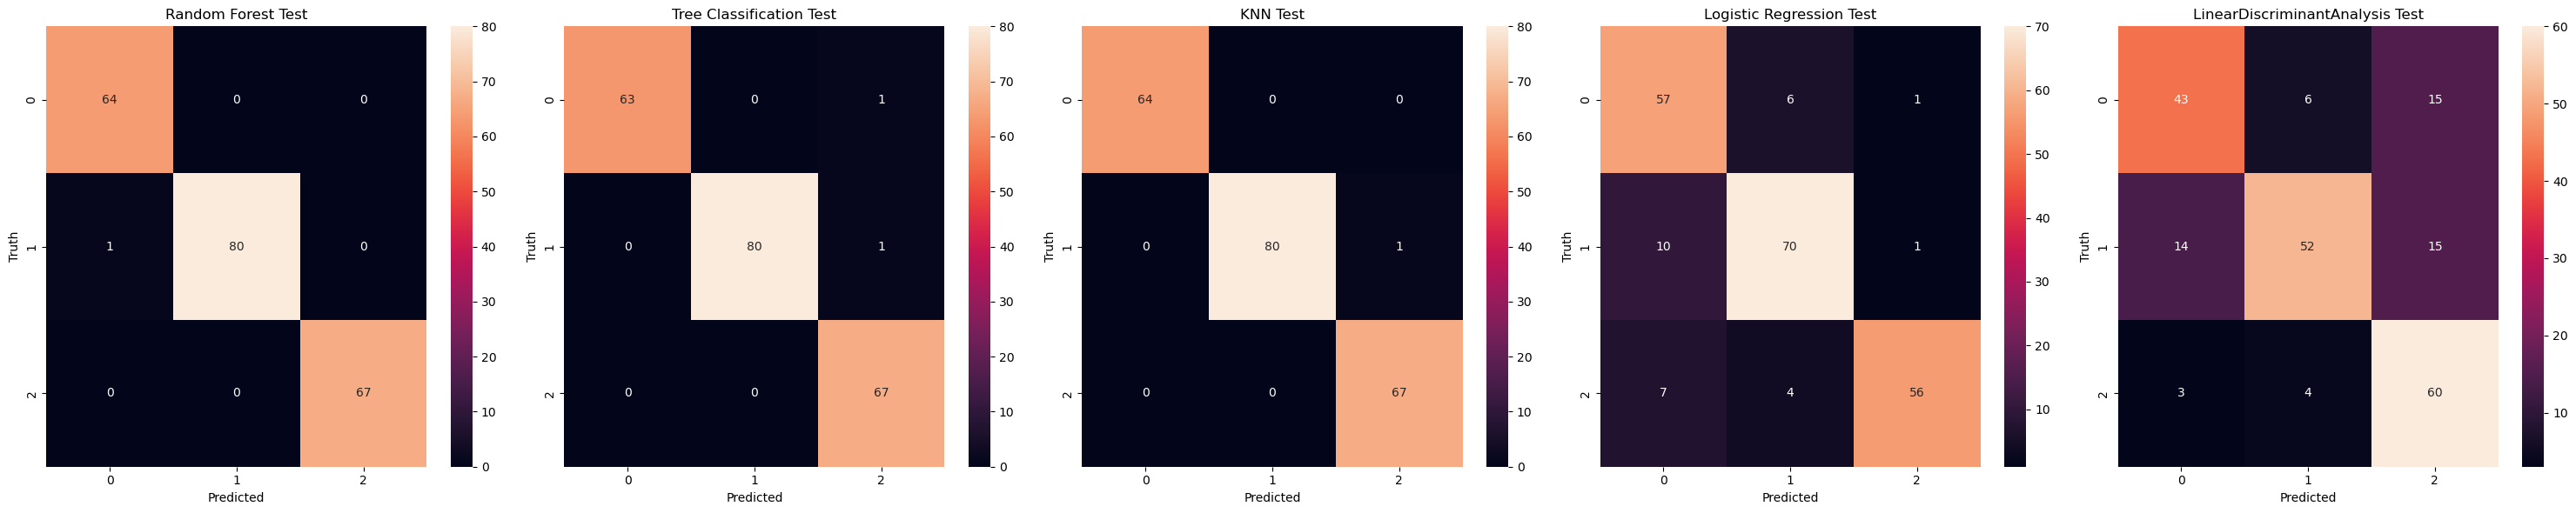

In [23]:
class ModelUtil:
    
    def __init__(self):
        self.scores_rf = []
        self.scores_t = []
        self.scores_knn = []
        self.scores_lr = []
        self.scores_lda = []

        self.cm_rf = []
        self.cm_t = []
        self.cm_knn = []
        self.cm_lr = []
        self.cm_lda = []
        
        self.__statement = "{} score: {}\n"
        
    def calculate_avarage(self):
        self.scores_rf = [statistics.mean(self.scores_rf)]
        self.scores_t = [statistics.mean(self.scores_t)]
        self.scores_knn = [statistics.mean(self.scores_knn)]
        self.scores_lr = [statistics.mean(self.scores_lr)]
        self.scores_lda = [statistics.mean(self.scores_lda)]
        
    def __str__(self):
        statement = self.__statement.format("Random Forest", self.scores_rf)
        statement = statement + self.__statement.format("Classification Tree", self.scores_t)
        statement = statement + self.__statement.format("KNN", self.scores_knn)
        statement = statement + self.__statement.format("Logistic Regression", self.scores_lr)
        statement = statement + self.__statement.format("LinearDiscriminantAnalysis", self.scores_lda)
        return statement
    
    def visualizeAsTable(self):
        data = {
            'Model':["10-CV Average Score","Test Score"],
            'Random Forest': self.scores_rf,
            'Tree Classification':self.scores_t,
            'KNN': self.scores_knn,
            'Logistic Regression': self.scores_lr,
            "LinearDiscriminantAnalysis":self.scores_lda
        }
        df = pd.DataFrame(data)
        df = df.set_index('Model')
        return df.T
    
    def visualizeAsMatrix(self):
        confusion_matrices = [self.cm_rf[-1], self.cm_t[-1], self.cm_knn[-1], self.cm_lr[-1], self.cm_lda[-1]]
        titles = ["Random Forest Test", "Tree Classification Test", "KNN Test", "Logistic Regression Test", "LinearDiscriminantAnalysis Test"]
        fig, axes = plt.subplots(1, 5, figsize=(30, 6))
        for ax, cm, title in zip(axes, confusion_matrices, titles):
            sn.heatmap(cm, annot=True, ax=ax)
            ax.set_xlabel('Predicted')
            ax.set_ylabel('Truth')
            ax.set_title(title)
        plt.tight_layout()
        plt.show()
        
def getscore(model, x_train, x_test, y_train, y_test, scores, cms):
    fitted_model = model.fit(x_train, y_train)
    scores.append(fitted_model.score(x_test, y_test))
    y_predicted = fitted_model.predict(x_test)
    cms.append(confusion_matrix(y_test,y_predicted))
    
def fitAllModel(mul,x_train, x_test, y_train, y_test):
    getscore(RandomForestClassifier(), x_train, x_test, y_train, y_test, mul.scores_rf, mul.cm_rf)
    getscore(DecisionTreeClassifier(), x_train, x_test, y_train, y_test, mul.scores_t, mul.cm_t)
    getscore(KNeighborsClassifier(), x_train, x_test, y_train, y_test, mul.scores_knn, mul.cm_knn)
    getscore(LDA(), x_train, x_test, y_train, y_test, mul.scores_lda, mul.cm_lda)
    # Scale the data for Logistic Regression
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    getscore(LogisticRegression(solver='lbfgs', max_iter=1000), x_train_scaled, x_test_scaled, y_train, y_test, mul.scores_lr, mul.cm_lr)
    
def fitAllModelCVandTest(data_train, data_test):
    kf = KFold(n_splits=10)
    mu = ModelUtil()
    
    #10 Fold CV
    for train_index, test_index in kf.split(data_train):  
        x_train, x_test = data_train.iloc[train_index], data_train.iloc[test_index]
        y_train, y_test = x_train.pop('Grade'), x_test.pop('Grade')
        fitAllModel(mu, x_train, x_test, y_train, y_test)
    mu.calculate_avarage()
    
    #Fitting model with Train and predicting Score with Test
    train_y = data_train.pop('Grade')
    test_y = data_test.pop('Grade')
    fitAllModel(mu ,data_train, data_test, train_y, test_y)
    
    print(mu.visualizeAsTable())
    mu.visualizeAsMatrix()
    
data_train, data_test = train_test_split(data, test_size=0.2)
fitAllModelCVandTest(data_train, data_test)

### Our thoughts on Model before pre-processing

We think that Random Forest, Classification Tree and KNN Perform very well. However we are going to pre-porcess the data and fine-tune the model to see if there is a difference in performance

## 3. Logistic Regression

#### 3.1 Logistic Regression Assumptions:

Binary or Multinomial Outcome: The dependent variable should be binary (or multinomial for multinomial logistic regression).

Independence of Observations: Observations should be independent of each other.

No Multicollinearity: Predictor variables should not be highly correlated.

Linearity of Logit: The logit transformation of the outcome variable should have a linear relationship with the predictor variables.

No Extreme Outliers: Logistic regression is sensitive to extreme outliers.

In [24]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# Checking for Multicollinearity using Variance Inflation Factor (VIF)
# For both LDA and Logistic Regression, we can use the same independent variables
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("\n--Checking Multicollinearity--\n")
normality_test_results = {col: stats.shapiro(X[col]) for col in X.columns}
print(vif_data)

print("\n--Checking Normality--\n")
shapiro_df = pd.DataFrame(normality_test_results).T
shapiro_df.columns = ['statistic','pvalue']
print(shapiro_df)

print("\n--Checking outliers--")
z_scores = np.abs(stats.zscore(X))
outliers = np.where(z_scores > 3)
print(outliers)


--Checking Multicollinearity--

      feature        VIF
0          pH  24.682153
1  Temprature  22.778805
2       Taste   2.514347
3        Odor   2.385355
4        Fat    4.040139
5   Turbidity   2.755914
6      Colour  39.160374

--Checking Normality--

            statistic        pvalue
pH           0.834568  9.517439e-32
Temprature   0.755079  6.363698e-37
Taste        0.633407  1.142058e-42
Odor         0.629923  8.281674e-43
Fat          0.592394  2.942727e-44
Turbidity    0.636478  1.520409e-42
Colour       0.731140  3.262809e-38

--Checking outliers--
(array([ 13,  58, 106, 162, 190, 213, 290, 318, 341, 426, 469, 525, 604,
       675, 737, 765, 788], dtype=int64), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))


#### 3.2 pre-processing


In [25]:
# splittin data 80-20

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

#### without pre-processing for comparision
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

# Normalizing the data
scaler_norm = MinMaxScaler()
X_normalized = scaler_norm.fit_transform(X)

# Standardizing the data
scaler_std = StandardScaler()
X_standardized = scaler_std.fit_transform(X)

# Function to fit models and evaluate performance
def fit_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000).fit(X_train, y_train)
    log_reg_acc = log_reg.score(X_test, y_test)
    return  log_reg_acc

# Evaluating models on normalized data and std data
log_reg_acc_norm = fit_and_evaluate(X_normalized, y_encoded)
log_reg_acc_std = fit_and_evaluate(X_standardized, y_encoded)

model_performance_dict = {
    "Logistic Regression": {
        "Base": accuracy_log_reg,
        "Normalization": log_reg_acc_norm,
        "Standardization": log_reg_acc_std
    }
}

model_performance_df = pd.DataFrame(model_performance_dict).T
model_performance_df

C:\Users\karth\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Base,Normalization,Standardization
Logistic Regression,0.731132,0.764151,0.839623


### Our Conclusion on Logistic Regression



**Multicollinearity:** High VIF values (generally above 5 or 10) indicate significant multicollinearity. pH, Temperature, and Colour show high VIF scores, suggesting multicollinearity concerns. This could affect the performance of both models, especially logistic regression.

**Normality Test (Shapiro-Wilk Test):** The null hypothesis for this test is that the data is normally distributed. All predictor variables have very low p-values, indicating that the null hypothesis of normality can be rejected. This means these variables do not follow a normal distribution, which is a concern for LDA.

**Outliers:** are detected in the Temperature column (index 1), as indicated by Z-scores greater than 3.
Outliers can significantly impact the performance of logistic regression.

The performance of Linear Regression noticeably improved following Standardization and Normalization, with Standardization  yielding better results. However, despite these enhancements, Linear Regression did not achieve results comparable to the top three models.

## 4. Linear Discriminant Analysis

#### 4.1 Assumption Analysis

Both Linear Discriminant Analysis (LDA) and Logistic Regression share similar assumptions, which have been thoroughly examined in the preceding code.

#### 4.2 pre-processing

We follow same preprocessing technique as Linear Regression which has been accomplished in previous code. So we are using the same pre-processed data from Linear Regression

In [26]:
seed = 42
def fit_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    lda = LDA().fit(X_train, y_train)
    lda_acc = lda.score(X_test, y_test)
    return lda_acc

#Before pre-processing 
lda = LDA()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# After pre-processing
lda_acc_norm = fit_and_evaluate(X_normalized, y_encoded)
lda_acc_std = fit_and_evaluate(X_standardized, y_encoded)

model_performance_dict = {
    "Linear Discriminant Analysis": {
        "Base": accuracy,
        "Normalization": lda_acc_norm,
        "Standardization": lda_acc_std
    }
}

model_performance_df = pd.DataFrame(model_performance_dict).T
model_performance_df

,Base,Normalization,Standardization
Linear Discriminant Analysis,0.754717,0.754717,0.754717


### Our conclusion on Linear discriminat Analysis

Standardization and Normalization had no significant effect on the performance of Linear Discriminant Analysis (LDA).

## 5. KNN

#### 5.1 Pre-processing

In [27]:
milk = pd.read_csv('milknew.csv')
X = milk[['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']]
y = milk['Grade']

#scaler = StandardScaler()
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour'])
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=seed)

#### 5.2 Hyperparameter tuning


Cross-Validated Test Scores:

{'n_neighbors': 1}: 0.997638
{'n_neighbors': 3}: 0.993310
{'n_neighbors': 5}: 0.991349
{'n_neighbors': 7}: 0.988207
{'n_neighbors': 9}: 0.980710
{'n_neighbors': 11}: 0.958291
{'n_neighbors': 13}: 0.940191
{'n_neighbors': 15}: 0.935476
{'n_neighbors': 17}: 0.933908
{'n_neighbors': 19}: 0.925243

CV Accuracy: 96.443231%

Best Parameters:

{'n_neighbors': 1}

Best Model Results (k=1):

              precision    recall  f1-score   support

        high       1.00      0.98      0.99        51
         low       0.99      1.00      0.99        86
      medium       1.00      1.00      1.00        75

    accuracy                           1.00       212
   macro avg       1.00      0.99      0.99       212
weighted avg       1.00      1.00      1.00       212

[[50  1  0]
 [ 0 86  0]
 [ 0  0 75]]

Testing Accuracy: 99.528302%


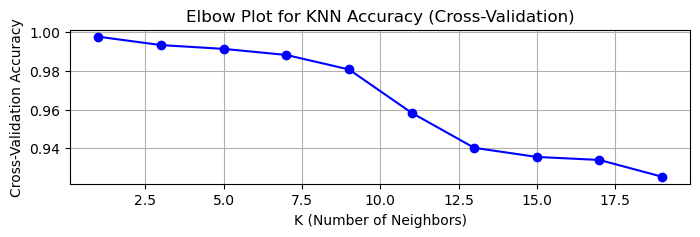

In [28]:
 # Defining the parameters
KNN_params = { "n_neighbors": range(1, 20, 2) }
KNN = KNeighborsClassifier()

# Tunning parameters: Grid search CV
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=KNN, param_grid=KNN_params, n_jobs=-1, cv=cv, scoring="accuracy")
grid_results = grid_search.fit(X_train, y_train)

# Extracting and printing mean test scores
print("\nCross-Validated Test Scores:\n")
cv_scores = grid_results.cv_results_['mean_test_score']
for params, cv_score in zip(grid_results.cv_results_['params'], cv_scores):
    print(f"{params}: {cv_score:.6f}")

# Printing cv Accuracy
cv_accuracy = cv_scores.mean() * 100
print("\nCV Accuracy: {:.6f}%".format(cv_accuracy))

#Best k
print("\nBest Parameters:\n")
print(grid_results.best_params_)

# Best model k=1
print("\nBest Model Results (k=1):\n")
final_model = grid_results.best_estimator_
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)


# Results
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
test_accuracy = accuracy_score(y_test, final_model.predict(X_test)) * 100
print("\nTesting Accuracy: {:.6f}%".format(test_accuracy))

#visualizing
k_values = KNN_params['n_neighbors']
cv_accuracies = grid_search.cv_results_['mean_test_score']

# Plot the elbow plot
plt.figure(figsize=(8, 2))
plt.plot(k_values, cv_accuracies, marker='o', linestyle='-', color='b')
plt.title('Elbow Plot for KNN Accuracy (Cross-Validation)')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)
plt.show()

### Our thoughts on KNN

After Pre-processing with Normalization (min-max scaler) using gridsearch CV with 10 splits give us the optimal k = 1 neighbor with 1 misclassification.

- CV Accuracy: 96.443231%
- Testing Accuracy: 99.528302%

With k = 1 we suspect overfitting and we feel that it might not perform well with new data.

## 6. Tree

#### 6.1 Hyper Parameter tuning with tuning the cost complexity parameter 

In [29]:
seed = 42

data = pd.read_csv("milknew.csv")
y = data['Grade']
model = MS(data.columns.drop('Grade'), intercept=False)
D = model.fit_transform(data)
feature_names = list(D.columns)
X = np.asarray(D)
X_train, X_test, y_train, y_test = skm.train_test_split(X, y, stratify=y, test_size=0.2, random_state=seed)

clf = DecisionTreeClassifier(random_state=seed) # Classification tree default arguments
clf.fit(X, y)

ccp_path = clf.cost_complexity_pruning_path(X_train , y_train)
kfold = skm.KFold(10, random_state=seed, shuffle=True)
grid = skm.GridSearchCV(clf, {'ccp_alpha': ccp_path.ccp_alphas}, refit=True , cv=kfold , scoring='accuracy')
grid_results = grid.fit(X_train , y_train)
print(grid_results)
print(grid.best_score_)

# Extracting and printing mean test scores
print("\nCross-Validated Test Scores:\n")
cv_scores = grid_results.cv_results_['mean_test_score']
for params, cv_score in zip(grid_results.cv_results_['params'], cv_scores):
    print(f"{params}: {cv_score:.6f}")

# Printing Testing Accuracy
cv_accuracy = cv_scores.mean() * 100
print("\nCV Accuracy: {:.6f}%".format(cv_accuracy))

# Best alpha "cost complexity value for pruning"
print("\nBest Parameters:\n")
print(grid_results.best_params_)

# Best model with alpha = 0

print("\nBest Model Results (alpha = 0):\n")
best_ = grid.best_estimator_
best_.fit(X_train, y_train)
y_pred = best_.predict(X_test)

# Results
# Confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_table(y_test, y_pred))

test_accuracy = accuracy_score(y_test, best_.predict(X_test)) * 100
print("\nTesting Accuracy: {:.6f}%".format(test_accuracy))

clf.classes_

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': array([0.        , 0.00117189, 0.00117408, 0.00226682, 0.00231755,
       0.00293848, 0.01125684, 0.03280836, 0.03627128, 0.0739078 ,
       0.09899868, 0.15116901])},
             scoring='accuracy')
0.9952941176470589

Cross-Validated Test Scores:

{'ccp_alpha': 0.0}: 0.995294
{'ccp_alpha': 0.0011718920809829934}: 0.995294
{'ccp_alpha': 0.0011740784468057197}: 0.995294
{'ccp_alpha': 0.0022668240850059027}: 0.992913
{'ccp_alpha': 0.0023175477720932245}: 0.992913
{'ccp_alpha': 0.0029384756657483938}: 0.989370
{'ccp_alpha': 0.011256842331222499}: 0.978739
{'ccp_alpha': 0.03280835945141335}: 0.912717
{'ccp_alpha': 0.03627127628050563}: 0.880756
{'ccp_alpha': 0.07390780163225114}: 0.818235
{'ccp_alpha': 0.0989986818808079}: 0.766204
{'ccp_alpha': 0.1511690112963348}: 0.565014

CV Accuracy: 90.689542%

Best Parameters:

{'c

array(['high', 'low', 'medium'], dtype=object)

In [30]:
max_depth = best_.get_depth()
print("\nMaximum depth: ", max_depth)


Maximum depth:  10


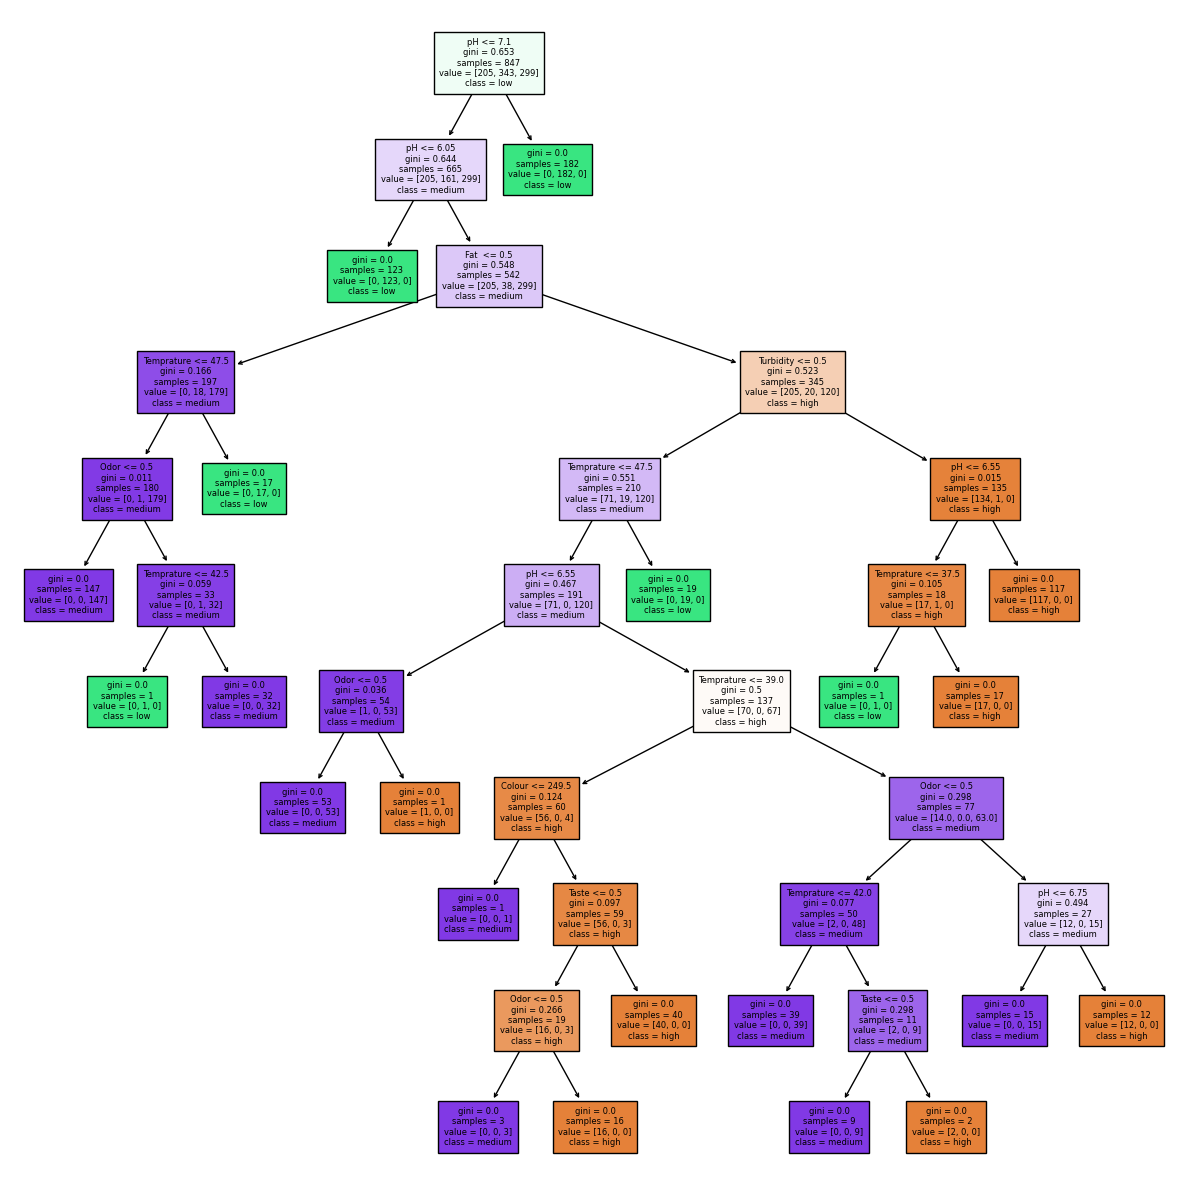

In [31]:
# Printing the tree with cost complexity equal zero therefore no pruning was needed.
ax = subplots(figsize=(12,12))[1]
plot_tree(best_, fontsize = 6, filled=True,feature_names=feature_names, class_names=clf.classes_,ax=ax)
plt.tight_layout()
plt.savefig("decision_treebook_plot.png")

#### 6.2 Tree tuning the parameters max_depth, min_samples_split and min_samples_leaf

In [20]:
tree_params = {
    "criterion": ['gini', 'entropy'],
    "splitter": ['best', 'random'],
    "max_depth": range(1, 20),
    "min_samples_split": range(2, 11), # Pruning step to avoid overfitting
    "min_samples_leaf": range(1, 11), # Pruning step to avoid overfitting
}

# Decision Tree with pruning parameters
tree_classifier = DecisionTreeClassifier(random_state=seed)

# Grid search
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
grid_search = GridSearchCV(estimator=tree_classifier, param_grid=tree_params, n_jobs=-1, cv=cv, scoring="accuracy", error_score=0)
grid_results = grid_search.fit(X_train, y_train)

# Best model
final_tree_model = grid_results.best_estimator_
final_tree_model.fit(X_train, y_train)
y_pred_tree = final_tree_model.predict(X_test)

# Results
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
print("Best Parameters:")
print(grid_results.best_params_)

# Test accuracy
test_accuracy = accuracy_score(y_test , final_tree_model.predict(X_test))*100
print("Testing Accuracy: {}".format(test_accuracy))

# Deviance: A small deviance indicates a tree that provides a good fit to the data
deviance = np.sum(log_loss(y_test, final_tree_model.predict_proba(X_test)))
print('Deviance: ', deviance)


Decision Tree Classification Report:
              precision    recall  f1-score   support

        high       1.00      0.98      0.99        51
         low       0.99      1.00      0.99        86
      medium       1.00      1.00      1.00        75

    accuracy                           1.00       212
   macro avg       1.00      0.99      0.99       212
weighted avg       1.00      1.00      1.00       212

Confusion Matrix:
[[50  1  0]
 [ 0 86  0]
 [ 0  0 75]]
Best Parameters:
{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Testing Accuracy: 99.52830188679245
Deviance:  0.17001723296753418


In [21]:
# Print the decision tree
labels = ['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']
tree_rules = export_text(final_tree_model, feature_names=labels)
print("Decision Tree Rules:\n", tree_rules)

Decision Tree Rules:
 |--- Turbidity <= 0.75
|   |--- pH <= 7.95
|   |   |--- Temprature <= 57.58
|   |   |   |--- Fat  <= 0.38
|   |   |   |   |--- pH <= 3.13
|   |   |   |   |   |--- class: low
|   |   |   |   |--- pH >  3.13
|   |   |   |   |   |--- Temprature <= 39.86
|   |   |   |   |   |   |--- class: medium
|   |   |   |   |   |--- Temprature >  39.86
|   |   |   |   |   |   |--- pH <= 6.62
|   |   |   |   |   |   |   |--- Temprature <= 40.50
|   |   |   |   |   |   |   |   |--- class: medium
|   |   |   |   |   |   |   |--- Temprature >  40.50
|   |   |   |   |   |   |   |   |--- Temprature <= 45.20
|   |   |   |   |   |   |   |   |   |--- class: medium
|   |   |   |   |   |   |   |   |--- Temprature >  45.20
|   |   |   |   |   |   |   |   |   |--- class: low
|   |   |   |   |   |   |--- pH >  6.62
|   |   |   |   |   |   |   |--- class: medium
|   |   |   |--- Fat  >  0.38
|   |   |   |   |--- pH <= 6.52
|   |   |   |   |   |--- pH <= 6.21
|   |   |   |   |   |   |--- class: 

### Our Thoughts on Trees

- Criterion: Gini (default Gini)
- Best alpha=0, therefore no prunning needed.
- max_depth = 10 (How deep to grow the tree).
- min_samples_leaf = default none (minimum number of observations required to be at a leaf node default = 1)
- min_samples_split = default 2 (minimum number of observations in a node to be eligible for splitting)
- splitter = best
- Test accuracy: 99.52830188679245.
- Number of misclassifications 1.

- For classification minimizing the misclassification rate is not usually done at the growth stage as it is too jumpy.
- Instead, usually the Gini index, deviance, or cross-entropy is used to evaluate the quality of a particular split1
- Numerically these are very similar and most of the time, it won’t make a large difference which you use.

**Prunning**  
- Building a tree through the description just given will tend to overfit1 to the training data and lead to poor test set performance.
- A common strategy is to grow a large tree, T0, and then prune it back to obtain a subtree.
- Intuitively, our goal is to select a subtree that leads to the lowest test error rate.

**Cross-validation**
- Given a subtree, we can estimate its test error using cross-validation or the validation set approach.
- However, estimating the cross-validation error for every possible subtree would be too cumbersome, since there is an extremely large number of possible subtrees.
- Instead, of considering every possible subtree, we select a small set of subtrees for consideration using cost complexity pruning 1

**Tunning parameter**

- When alpha = 0 then the subtree T is equal to T0.
- Using k-fold cross validation, we both build trees, and prune them back for possible values of 

## 7. Random Forest

### 7.1 Assumption Analysis

- no outliers
- no correlation among trees
- no missing value : We know there is no missing value from EDA

--Correlation--


/Users/nayemontiel18/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


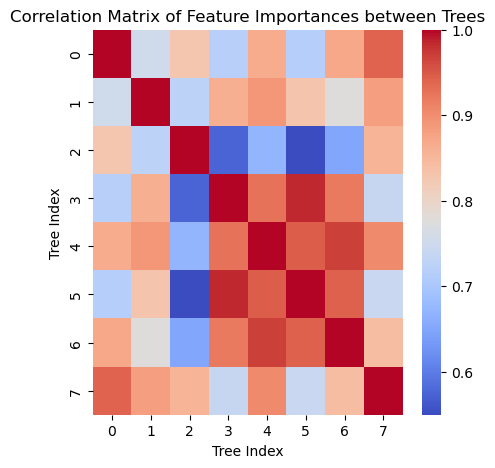

--Outlier of Temprature --


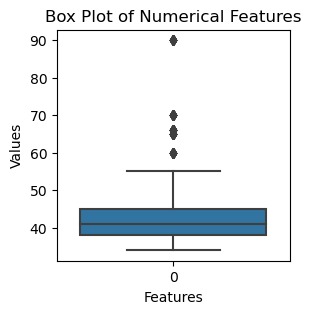

--Outlier of pH --


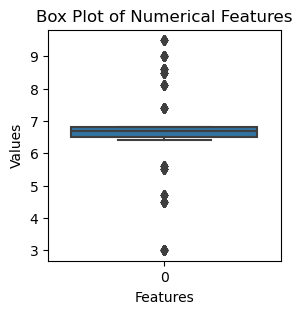

In [22]:
data = pd.read_csv("milknew.csv")
train_X, test_X = train_test_split(data, test_size=0.2)
train_y = train_X.pop('Grade')
test_y = test_X.pop('Grade')
forest = RandomForestClassifier(warm_start=True, oob_score=True, n_estimators=8)
forest.fit(train_X,train_y)
trees_correlation = np.corrcoef([tree.feature_importances_ for tree in forest.estimators_])

print("--Correlation--")
plt.figure(figsize=(5, 5))
sns.heatmap(trees_correlation,cmap='coolwarm')
plt.title('Correlation Matrix of Feature Importances between Trees')
plt.xlabel('Tree Index')
plt.ylabel('Tree Index')
plt.show()

print("--Outlier of Temprature --")
plt.figure(figsize=(3, 3))
sns.boxplot(data=data['Temprature'])
plt.title('Box Plot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

print("--Outlier of pH --")
plt.figure(figsize=(3, 3))
sns.boxplot(data=data['pH'])
plt.title('Box Plot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()


### 7.2 Hyperparameter tuning

/Users/nayemontiel18/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/nayemontiel18/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


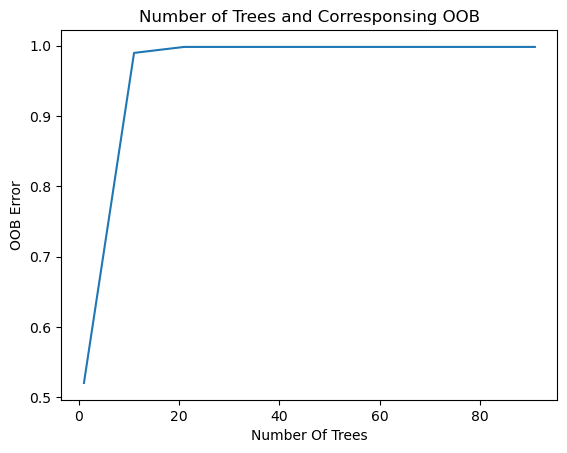

In [23]:
def analyseRandomForestHyperParameter(estimators, interval):
    data = pd.read_csv("milknew.csv") 
    X = data
    Y = X.pop('Grade')

    forest = RandomForestClassifier(warm_start=True, oob_score=True,random_state=42)
    no_of_trees = []
    oob_score = []

    for i in range(1, estimators, interval):
        forest.set_params(n_estimators=i)
        forest.fit(X, Y)
        no_of_trees.append(i)
        oob_score.append(forest.oob_score_)
        
    plt.plot(no_of_trees, oob_score)
    plt.xlabel('Number Of Trees')
    plt.ylabel('OOB Error')
    plt.title('Number of Trees and Corresponsing OOB')
    plt.show()
    
analyseRandomForestHyperParameter(100,10)    

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, FunctionTransformer
from sklearn.ensemble import RandomForestClassifier

# Read the data
data = pd.read_csv("milknew.csv")

# Split data into features (X) and target variable (y)
X = data.drop(columns=['Grade'])
y = data['Grade']

# Define a custom function to transform the target variable
def encode_grade(y):
    label_encoder = LabelEncoder()
    return label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numeric features
numeric_features = ['pH', 'Temprature', 'Colour']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine preprocessing steps for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Create a pipeline with preprocessing steps and model
pipeline = Pipeline(steps=[
    #('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state = 42))
])

# Define hyperparameters for grid search
param_grid = {
    'classifier__n_estimators': list(range(1, 25)),
    'classifier__max_depth': list(range(1, 10)),
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=10, n_jobs=-1)

# Transform target variable using FunctionTransformer
y_transformer = FunctionTransformer(encode_grade)
y_train_encoded = y_transformer.fit_transform(y_train)

# Fit the model
grid_search.fit(X_train, y_train_encoded)

# Best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the testing data
accuracy = grid_search.score(X_test, y_transformer.transform(y_test))
print("Accuracy:", accuracy)
grid_search

Best Hyperparameters: {'classifier__max_depth': 9, 'classifier__n_estimators': 7}
Accuracy: 0.9952830188679245


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'classifier__n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24]})

### 7.2 Results before and after pre-processing

In [25]:
def remove_outliers(data): 
    numeric_features = ['pH', 'Temprature']
    Q1 = data[numeric_features].quantile(0.25)
    Q3 = data[numeric_features].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3.5 * IQR
    upper_bound = Q3 + 3.5 * IQR
    outliers = (data[numeric_features] < lower_bound) | (data[numeric_features] > upper_bound)
    #print(outliers)
    clean_data = data[~outliers.any(axis=1)]
    return(clean_data)

forest = RandomForestClassifier(warm_start=True, oob_score=True, n_estimators=1)
data = data = pd.read_csv("milknew.csv")

train_X, test_X = train_test_split(data, test_size=0.2)

train_y = train_X.pop('Grade')
test_y = test_X.pop('Grade')
forest = RandomForestClassifier(warm_start=True, oob_score=True, n_estimators=1)
forest.fit(train_X,train_y)

print("\n--Before Preprocessing--\n")
print("accuracy: ", forest.score(test_X,test_y))
print("OOB Error: ", forest.oob_score_)


forest = RandomForestClassifier(warm_start=True, oob_score=True, n_estimators=1)
data = pd.read_csv("milknew.csv")
data = remove_outliers(data)

train_X, test_X = train_test_split(data, test_size=0.2)
train_y = train_X.pop('Grade')
test_y = test_X.pop('Grade')
forest = RandomForestClassifier(warm_start=True, oob_score=True, n_estimators=1)
forest.fit(train_X,train_y)

print("\n--After Preprocessing--\n")

print("accuracy: ", forest.score(test_X,test_y))
print("OOB Error: ", forest.oob_score_)




--Before Preprocessing--

accuracy:  0.9952830188679245
OOB Error:  0.5194805194805194

--After Preprocessing--

accuracy:  0.9932885906040269
OOB Error:  0.5983193277310924


/Users/nayemontiel18/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/nayemontiel18/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


<Axes: >

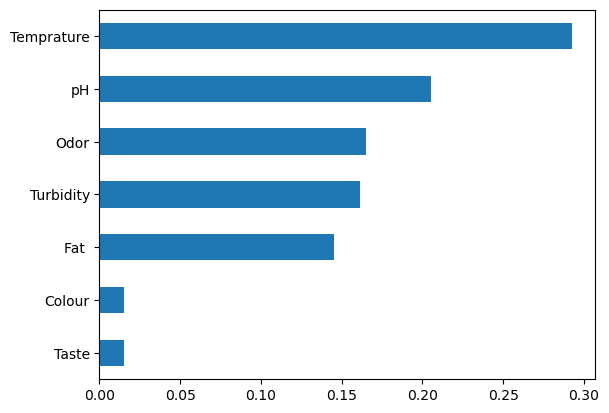

In [26]:
### 7.3 Variable Importance

importances = pd.Series(forest.feature_importances_, index = X.columns)
importances = importances.sort_values()
importances.plot.barh()

### Our thoughts on Random Forest

**Preprocessing Impact:**

   - No significant improvement post preprocessing (outlier removal in pH and temperature)

**Tree Correlation Analysis:**
   - Moderately positive correlation (0.74) among trees
   - Despite correlation, no significant impact on model's high performance in test and cross-validation

**Hyperparameter Tuning:**
    
   - Initial finding: Best model comprised just one tree using 10-fold cross-validation out-of-bag error
   - Further exploration revealed optimal model with classifier__max_depth: 7, classifier__n_estimators : 13, chosen for handling variability and potential performance on unseen data

**Best Parameters:**
   - Identified as pH and temperature, underscoring their importance in predicting the target variable.

## 8. Transformers

#### 8.1 Model preparation

In [34]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

data = pd.read_csv("milknew.csv")
# Data preprocessing
label_encoder = LabelEncoder()
data['Grade'] = label_encoder.fit_transform(data['Grade'])

X = data.drop(columns=['Grade'])
y = data['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class TransformerEncoderLayer(tf.keras.layers.Layer):
    def __init__(self, num_heads, d_model, ff_dim, dropout_rate=0.1):
        super(TransformerEncoderLayer, self).__init__()
        self.attention = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.ffn = tf.keras.Sequential([
            tf.keras.layers.Dense(ff_dim, activation='relu'),
            tf.keras.layers.Dense(d_model)
        ])
        self.layer_norm1 = tf.keras.layers.LayerNormalization(epsilon=1e-9)
        self.layer_norm2 = tf.keras.layers.LayerNormalization(epsilon=1e-9)
        self.dropout1 = tf.keras.layers.Dropout(dropout_rate)
        self.dropout2 = tf.keras.layers.Dropout(dropout_rate)

    def call(self, inputs, training):
        attn_output = self.attention(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layer_norm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layer_norm2(out1 + ffn_output)

class TransformerEncoder(tf.keras.Model):
    def __init__(self, num_layers, num_heads, d_model, ff_dim, input_vocab_size, maximum_position_encoding, dropout_rate=0.1):
        super(TransformerEncoder, self).__init__()
        self.d_model = d_model
        self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        self.pos_encoding = self.positional_encoding(maximum_position_encoding, self.d_model)
        self.enc_layers = [TransformerEncoderLayer(num_heads, d_model, ff_dim, dropout_rate) for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(dropout_rate)

    def positional_encoding(self, position, d_model):
        angle_rads = self.get_angles(np.arange(position)[:, np.newaxis], np.arange(d_model)[np.newaxis, :], d_model)
        angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
        angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
        pos_encoding = angle_rads[np.newaxis, ...]
        return tf.cast(pos_encoding, dtype=tf.float32)

    def get_angles(self, pos, i, d_model):
        angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
        return pos * angle_rates

    def call(self, inputs, training):
        seq_len = tf.shape(inputs)[1]
        inputs = self.embedding(inputs)
        inputs *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        inputs += self.pos_encoding[:, :seq_len, :]
        inputs = self.dropout(inputs, training=training)
        for i in range(len(self.enc_layers)):
            inputs = self.enc_layers[i](inputs, training)
        return inputs

num_layers = 4
num_heads = 4
d_model = 64
ff_dim = 256
input_vocab_size = 10000  
maximum_position_encoding = 1000 
dropout_rate = 0.1

inputs = tf.keras.layers.Input(shape=(X_train.shape[1],))
transformer_encoder = TransformerEncoder(num_layers, num_heads, d_model, ff_dim, input_vocab_size, maximum_position_encoding, dropout_rate)
x = transformer_encoder(inputs, training=True)
x = tf.keras.layers.GlobalAveragePooling1D()(x)  
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)  

model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


Epoch 1/10
22/22 [==============================] - 18s 156ms/step - loss: 1.2530 - accuracy: 0.4919 - val_loss: 0.8903 - val_accuracy: 0.4882
Epoch 2/10
22/22 [==============================] - 2s 69ms/step - loss: 0.4625 - accuracy: 0.7888 - val_loss: 0.2245 - val_accuracy: 0.9412
Epoch 3/10
22/22 [==============================] - 2s 78ms/step - loss: 0.1862 - accuracy: 0.9202 - val_loss: 0.1169 - val_accuracy: 0.9647
Epoch 4/10
22/22 [==============================] - 1s 62ms/step - loss: 0.0954 - accuracy: 0.9572 - val_loss: 0.1134 - val_accuracy: 0.9529
Epoch 5/10
22/22 [==============================] - 2s 68ms/step - loss: 0.0893 - accuracy: 0.9616 - val_loss: 0.1013 - val_accuracy: 0.9529
Epoch 6/10
22/22 [==============================] - 1s 63ms/step - loss: 0.0945 - accuracy: 0.9572 - val_loss: 0.0982 - val_accuracy: 0.9471
Epoch 7/10
22/22 [==============================] - 1s 61ms/step - loss: 0.0897 - accuracy: 0.9572 - val_loss: 0.0831 - val_accuracy: 0.9471
Epoch 8/10


#### Hyper Parameter tuning

- For the Normalization layer I changes value from 1e-6 to 1e-9  to change accuracy from around 90% to 93%.
- Changing drop out rate didn't have any major impact


### Our thoughts on Transformer

We've observed that the model achieves an accuracy of approximately 93%, which is commendable. However, it falls short compared to other models. Moreover, considering its computational complexity, we believe that it may not be the most efficient model for our needs.

## 9.Does pre-processing has any effect on Models?

As per our findings, pre-processing had a notable impact specifically on logistic regression models. However, its effect on other models such as LDA, FR, classification trees, and KNN was either insignificant or negligible.

## 10.Conclusion


In summary, our assessment indicates that Random Forest, Decision Trees, and KNN performed satisfactorily. If we were to choose two among them, our preference would lean towards Decision Trees and Random Forest. This preference stems from the observation that KNN with k=1 tends to overfit, while Decision Trees offer better interpretability and Random Forest demonstrates robustness in its performance.